In [1]:
import numpy as np
import dlib
import cv2
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
import sys

src = Path.cwd().parent / 'src'
sys.path.append(str(src))

from config import RAW_DATA_DIR

In [2]:
def get_first_frame(filepath):
    path = str(filepath)
    cap = cv2.VideoCapture(path)
    ret, frame = cap.read()
    if ret:
        frame = frame[..., [2, 1, 0]] # bgr to rgb
        return frame
    else:
        return None

In [4]:
list(RAW_DATA_DIR.glob('*'))

[]

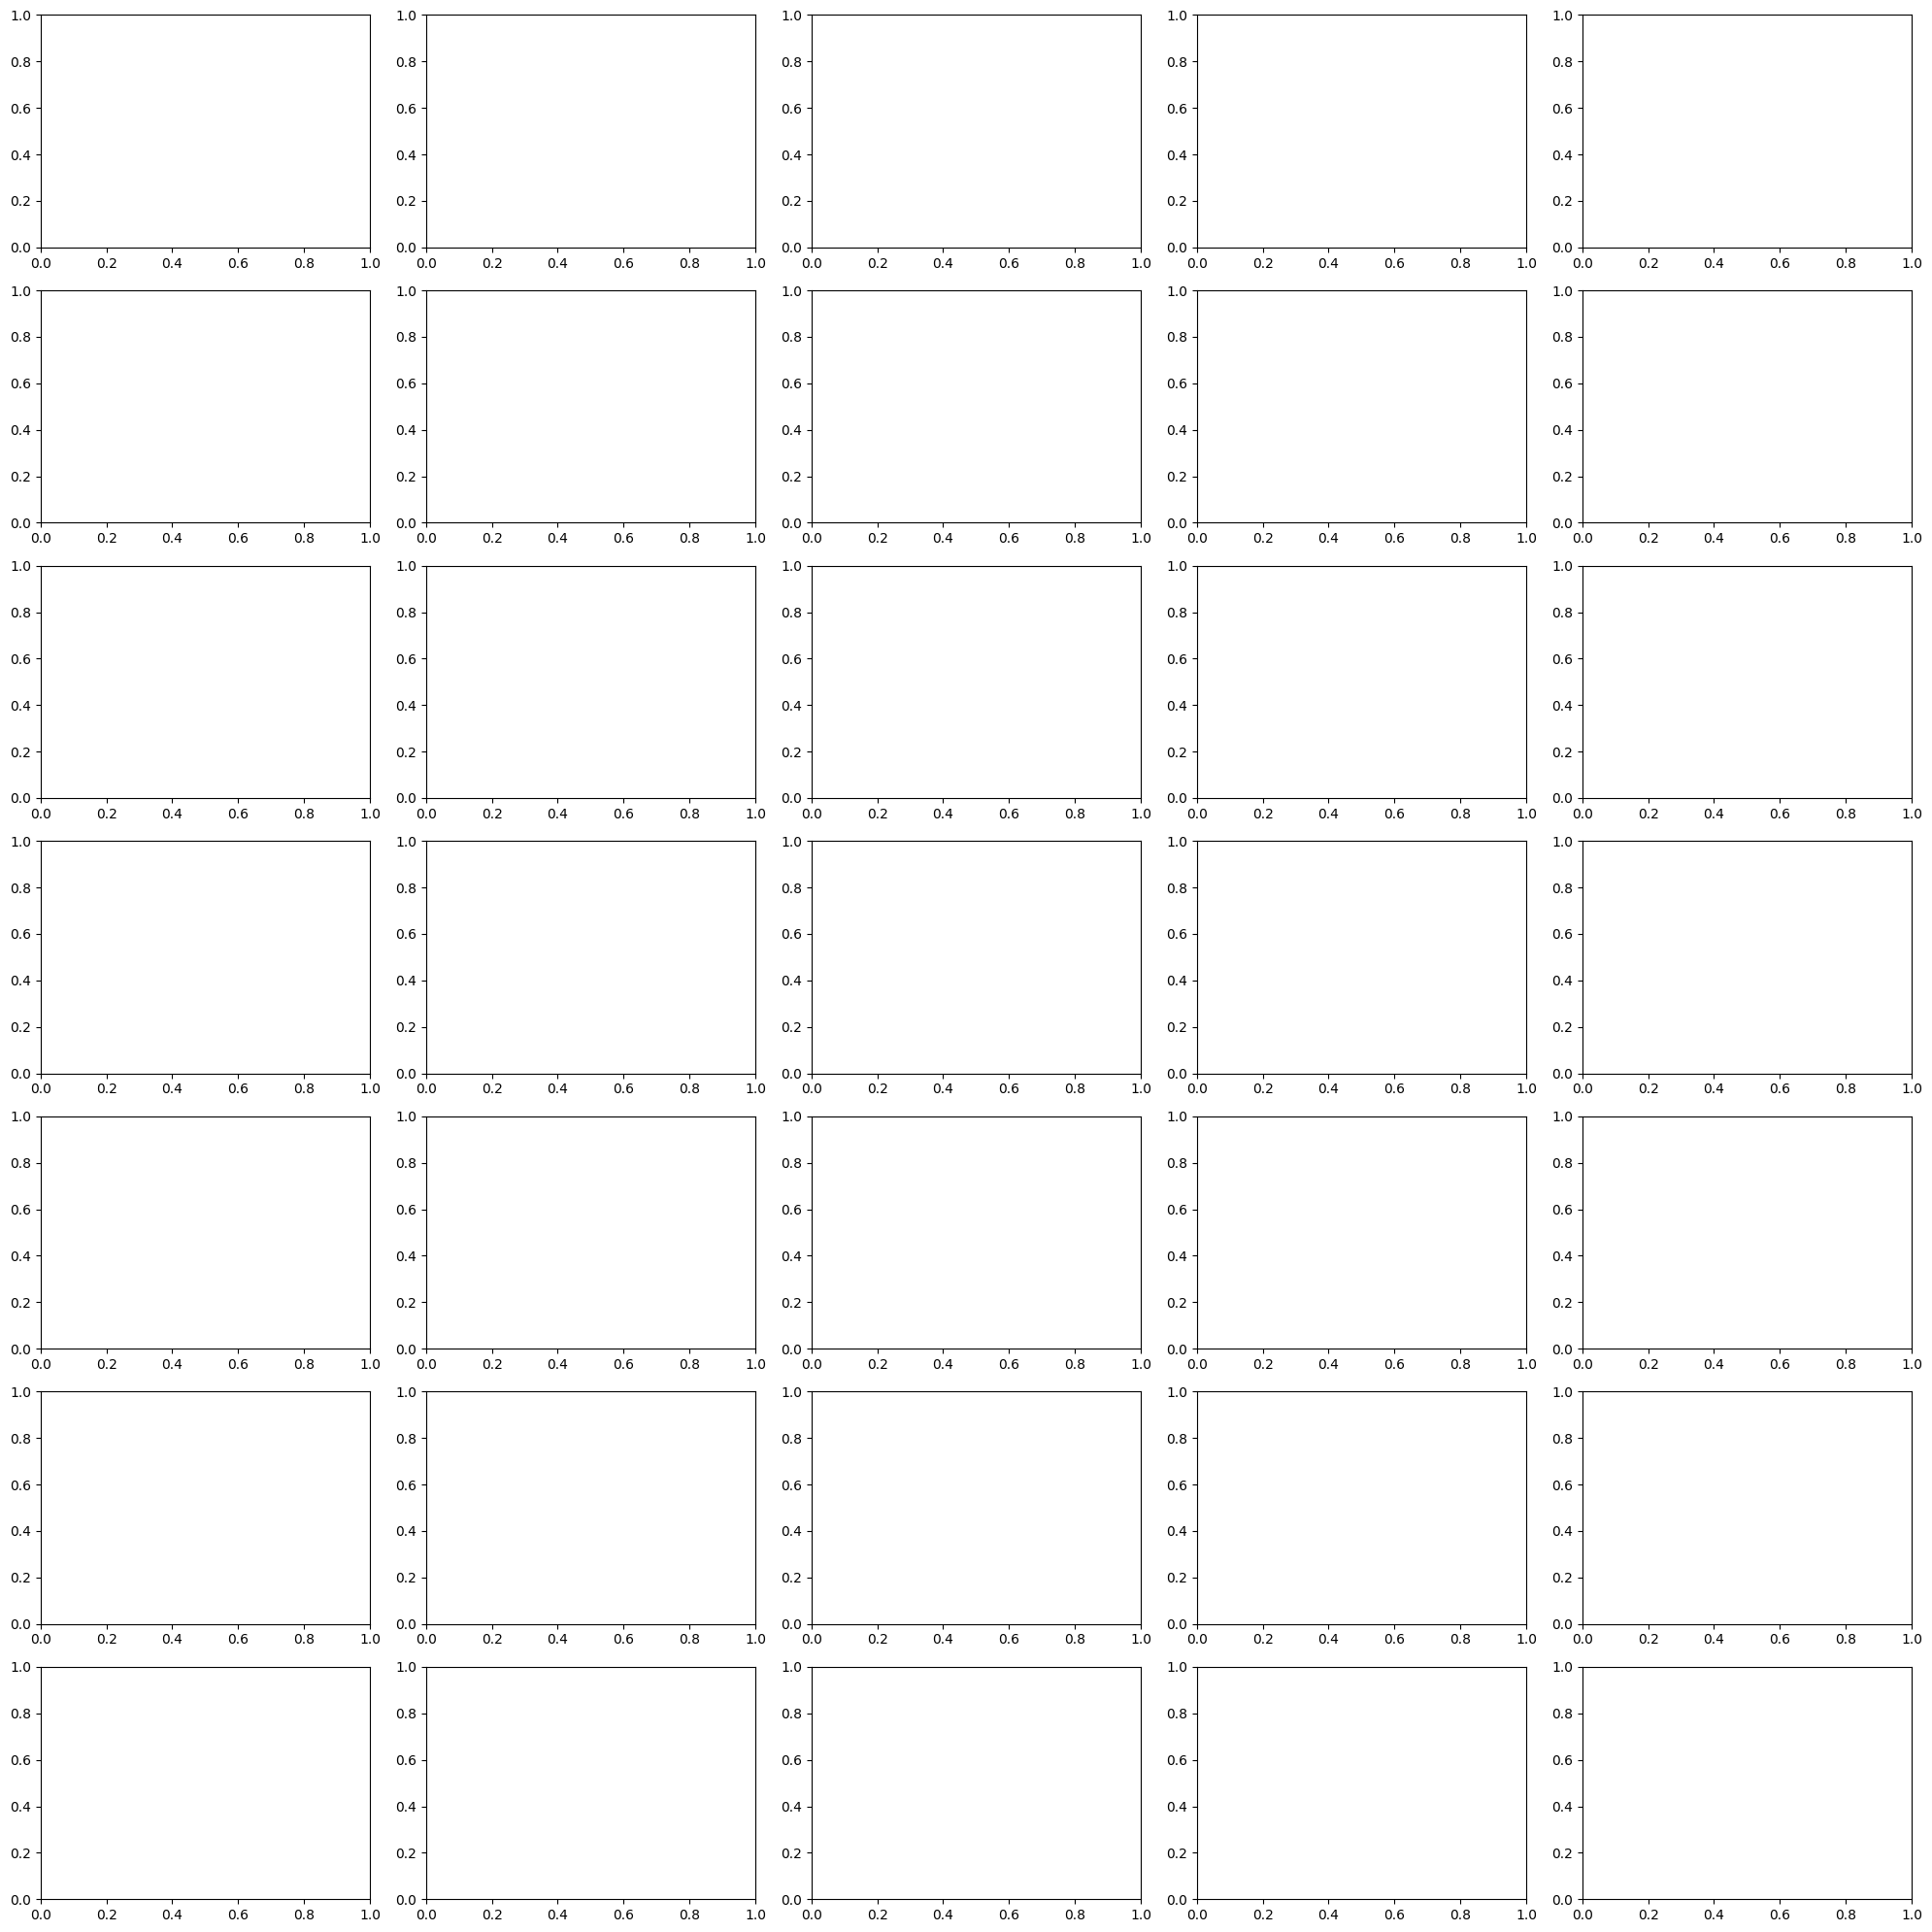

In [3]:
fig, axs = plt.subplots(7, 5, figsize=(20, 20))
axs = axs.ravel()
files = [subject_dir / 'vid.avi' for subject_dir in RAW_DATA_DIR.glob('*')]

for file, ax in zip(files, axs):
    ax.imshow(get_first_frame(file))
    ax.set_title(file.name[:-4])
plt.tight_layout()
plt.show()

Crop general face area to save time

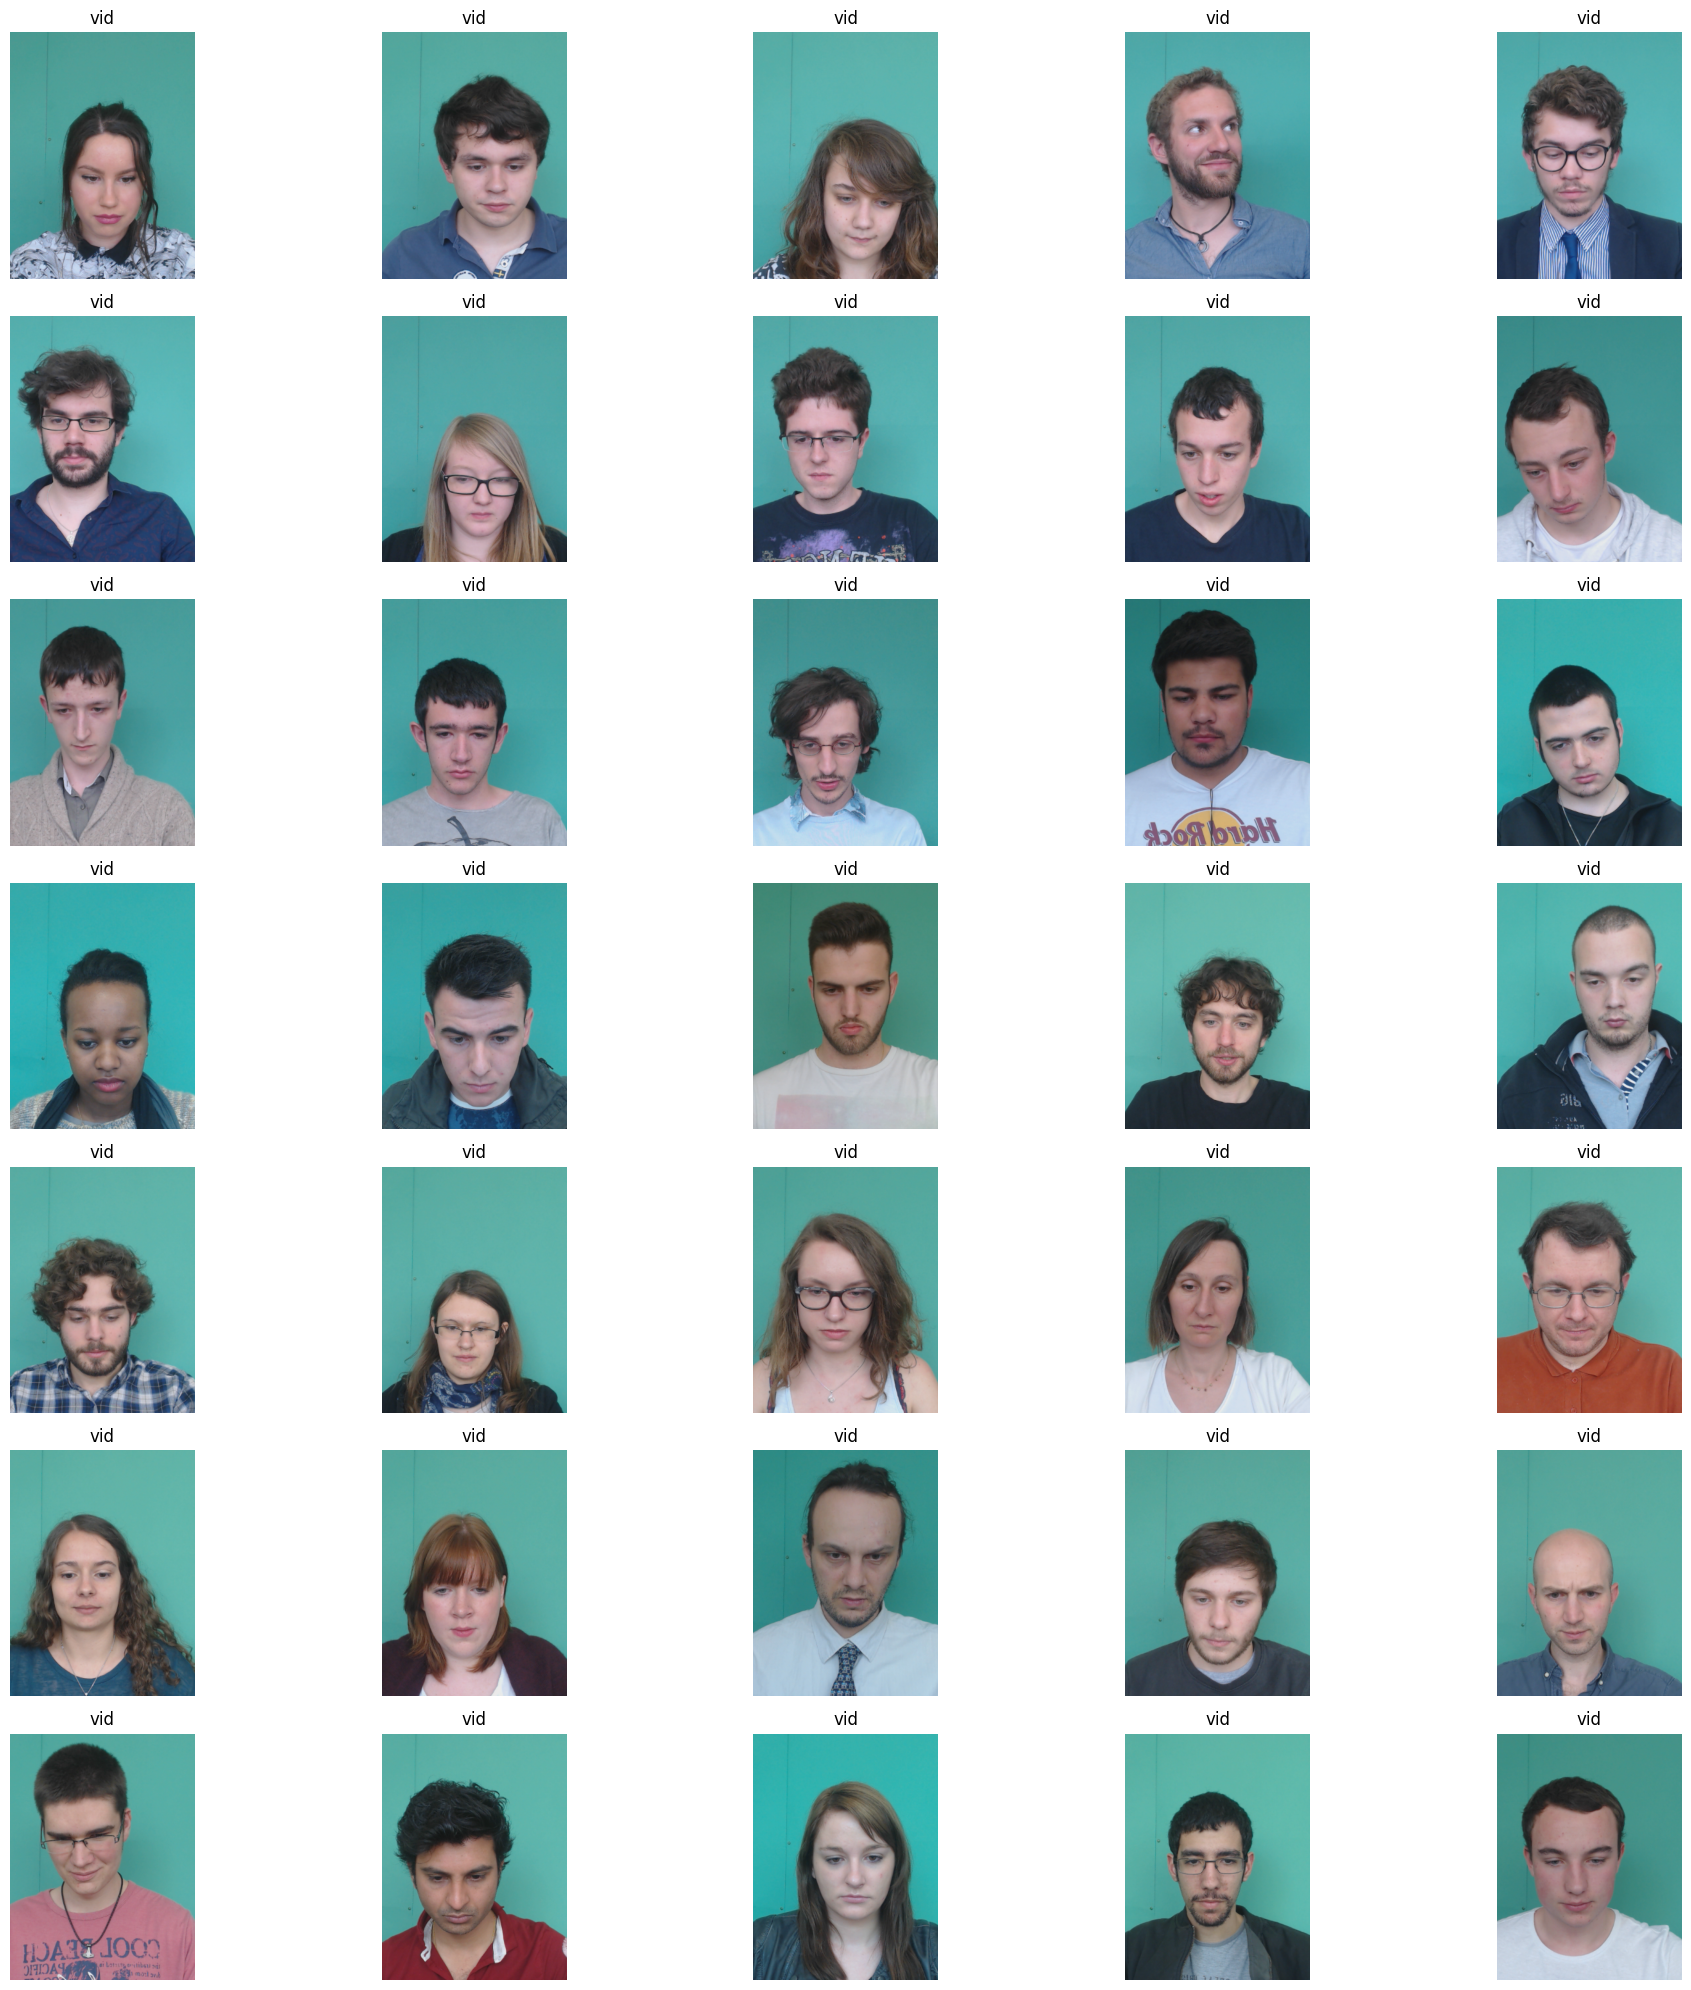

In [14]:
fig, axs = plt.subplots(7, 5, figsize=(20, 20))
axs = axs.ravel()

for file, ax in zip(files, axs):
    ax.imshow(get_first_frame(file)[:400, 200:500, :])
    ax.set_title(file.name[:-4])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [37]:
def avi2numpy(filepath: Path) -> np.ndarray:
    path = str(filepath)
    cap = cv2.VideoCapture(path)
    frames = []
    while True:
        ret, frame = cap.read()
        if ret:
            frames.append(frame.copy()[650:1000, 300:750, [2, 1, 0]])
        else:
            break
    return np.array(frames)

In [38]:
test_array = avi2numpy(files[0])

In [ ]:
sys.getsizeof(test_array)

In [ ]:

def crop_face(frames: np.ndarray) -> np.ndarray:
    pass

In [5]:
avi2numpy(filepath)